In [3]:
## 1 Camera Calibration
'First we calculate the camera calibartion matrix and distortion coefficients'

import numpy as np
import cv2
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline


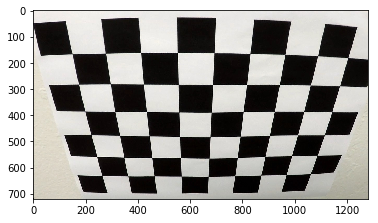

In [12]:
img = mpimg.imread('./camera_cal/calibration2.jpg')
plt.imshow(img)

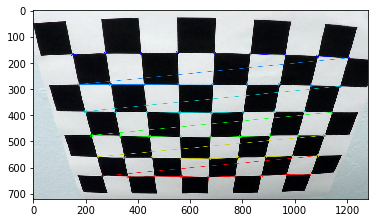

In [13]:
# Code mainly taken from lesson
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

objpoints = []
imgpoints = []

images = glob.glob('camera_cal/calibration2.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
        plt.imshow(img)

In [14]:
objpoints[0].shape
len(objpoints)
corners[0]

array([[ 149.50816345,  169.30766296]], dtype=float32)

In [17]:
## 2 Distortion Correction
'Calculate the distortion matrix and apply to images'

img = cv2.imread('camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
#plt.imshow(dst)
cv2.imwrite('camera_cal/calibration2_undist.jpg',dst)

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open("camera_cal/dist_pickle.p", "wb"));

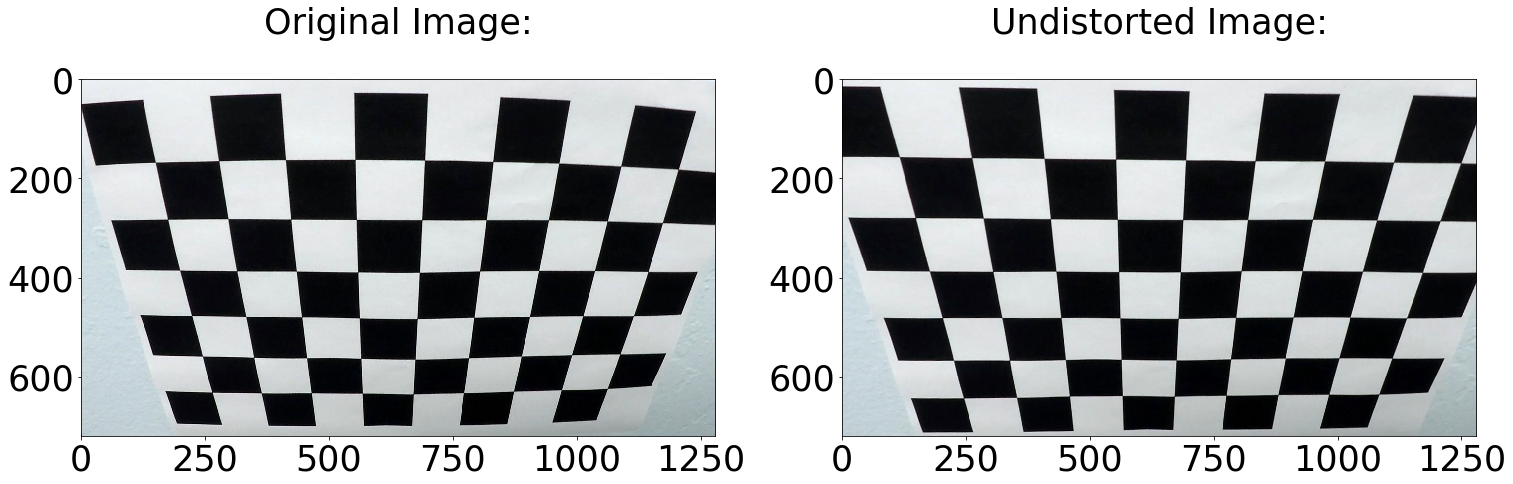

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10));

matplotlib.rc('xtick', labelsize=35) 
matplotlib.rc('ytick', labelsize=35)

ax1.imshow(img);
ax1.set_title('Original Image:\n', fontsize=35)
ax2.imshow(dst);
ax2.set_title('Undistorted Image:\n', fontsize=35)
plt.savefig('output_images/distortion_11.png', bbox_inches="tight")

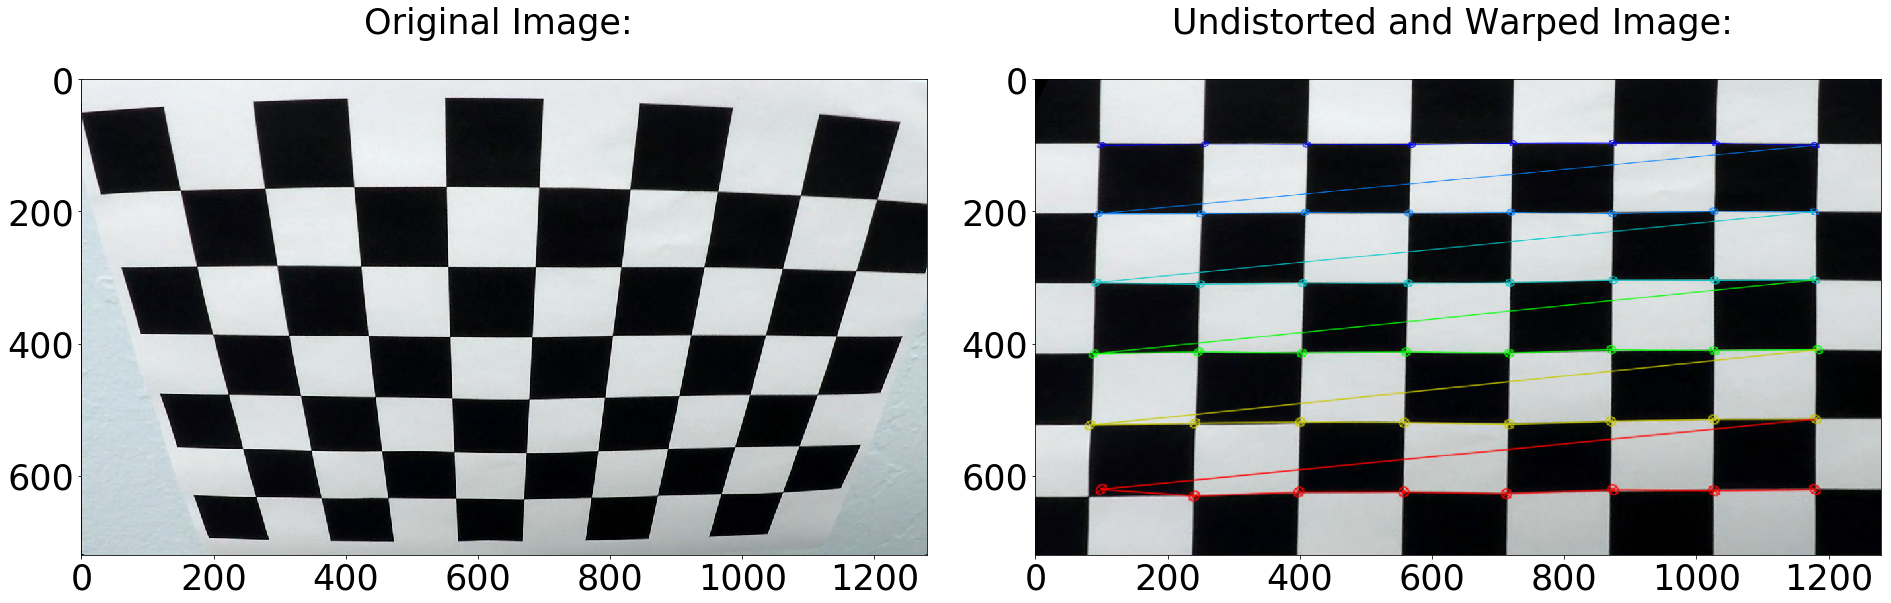

In [22]:
dist_pickle = pickle.load(open("camera_cal/dist_pickle.p", "rb" ))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
img = cv2.imread('camera_cal/calibration2.jpg')
nx = 8
ny = 6

def corners_unwarp(img, nx=nx, ny=ny, mtx=mtx, dist=dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        offset = 100
        img_size = (gray.shape[1], gray.shape[0])
        src = np.float32([corners[0],
                          corners[nx-1],
                          corners[-1],
                          corners[-nx]])
        dst = np.float32([[offset, offset],
                          [img_size[0]-offset, offset],
                          [img_size[0]-offset, img_size[1]-offset], 
                          [offset, img_size[1]-offset]])
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(undist, M, img_size)
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
f.tight_layout()

matplotlib.rc('xtick', labelsize=35) 
matplotlib.rc('ytick', labelsize=35)

ax1.imshow(img)
ax1.set_title('Original Image: \n', fontsize=35)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image: \n', fontsize=35)
plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)
plt.savefig('output_images/corners_unwarp2.png', bbox_inches="tight")

In [23]:
'Pipeline for image processing'
def plotter(test_img, new_img, plot_title=None, n=0):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    f.tight_layout()
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15)
    ax1.imshow(test_img)
    ax1.set_title('Original Image:', fontsize=15)
    ax2.imshow(new_img, cmap='gray')
    ax2.set_title('{0} Test {1}:'.format(plot_title, n+1), fontsize=15)

In [24]:
def pipeline(op=None):
    
    test_images = glob.glob('test_images/test*.jpg')
    print ('test_images ', len(test_images))
    n = 0
    for img in test_images:
        img = cv2.imread(img)
        test_img = bgr_to_rgb(img)
        if op == 'Undistorted':
            new_img = undistort(img)
            plotter(test_img, cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB), op, n)
            plt.savefig('output_images/undistorted.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Sobel X':
            new_img = undistort(img)
            new_img = sobel_x(img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/sobel_x.png'.format(op), bbox_inches="tight")
            break
        if op == 'Sobel Y':
            new_img = undistort(img)
            new_img = sobel_y(img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/sobel_y.png'.format(op), bbox_inches="tight")
            break
        if op == 'Gradient Magnitude':
            new_img = undistort(img)
            new_img = gradient_magnitude(img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/gradient_magnitude.png'.format(op), bbox_inches="tight")
            break
        if op == 'Gradient Direction':
            new_img = undistort(img)
            new_img = gradient_direction(img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/gradient_direction.png'.format(op), bbox_inches="tight")
            break
        if op == 'Color Thresholds':
            new_img = undistort(img)
            new_img = color_thresholds(img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/color_thresholds.png'.format(op), bbox_inches="tight")
            break
        if op == 'Multi-Thresholded Binary':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/thresholded_binary.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Region Masking':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img = region_of_interest(new_img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/region_masked.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Perspective Transform':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img = region_of_interest(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/perspective_transform.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Sliding Windows':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img = region_of_interest(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, 
            rightx, leftx_base, rightx_base = sliding_windows(new_img)
            plotter(test_img, windows_img, op, n)
            plt.plot(left_fitx, ploty, color='yellow')
            plt.plot(right_fitx, ploty, color='yellow')
            plt.xlim(0, 1280)
            plt.ylim(720, 0)
            plt.savefig('output_images/sliding_windows.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Shaded Lanes':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img = region_of_interest(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, 
            leftx, rightx, leftx_base, rightx_base = sliding_windows(new_img)
            shades_img, ploty, left_fitx, right_fitx,left_fit, right_fit = shaded_lanes(new_img, left_fit, right_fit)
            plotter(test_img, shades_img, op, n)
            plt.plot(left_fitx, ploty, color='yellow')
            plt.plot(right_fitx, ploty, color='yellow')
            plt.xlim(0, 1280)
            plt.ylim(720, 0)
            plt.savefig('output_images/shaded_lanes.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Radius of Curvature in Pixels':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, rightx,leftx_base, rightx_base = sliding_windows(new_img)
            left_curverad, right_curverad = roc_in_pixels(ploty, left_fit, right_fit, leftx, rightx)
            print('Test Image {0}\nLeft Radius of Curvature: {1:2f} pixels\nRight Radius of Curvature: {2:2f} pixels\n'.format(n+1, left_curverad, right_curverad))
            break
        if op == 'Radius of Curvature in Meters':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, 
            right_fit, leftx,rightx, leftx_base, rightx_base = sliding_windows(new_img)
            left_curverad, right_curverad = roc_in_meters(ploty, left_fit, right_fit, leftx, rightx)
            print('Test Image {0}\nLeft Radius of Curvature: {1:2f} meters\nRight Radius of Curvature: {2:2f} meters\n'.format(n+1, left_curverad, right_curverad))
            break
        if op == 'Camera Offset':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, rightx, leftx_base, rightx_base = sliding_windows(new_img)
            width = img.shape[1]
            img_center = width/2
            camera = offset(img_center, leftx_base, rightx_base)
            print('Test Image: {0}\nOffset from Lane Center: {1:2f} meters\n'.format(n+1, camera))
            break
        if op == 'Lane Mapping':
            undistorted_img = undistort(img)
            new_img = combined_thresholds(undistorted_img)
            warped_img, M, Minv = transform_perspective(new_img)
            new_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, rightx, leftx_base, rightx_base = sliding_windows(warped_img)
            new_img = lane_mapping(img.shape[:2], warped_img, Minv, ploty, left_fitx, right_fitx, cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/lane_mapping.png'.format(op), bbox_inches="tight")
            #break
        n += 1

In [25]:
def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def undistort(img):
    mtx = dist_pickle['mtx']
    dist = dist_pickle['dist']
    return cv2.undistort(img, mtx, dist, None, mtx)

test_images  6


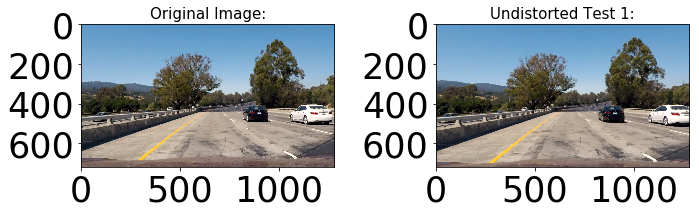

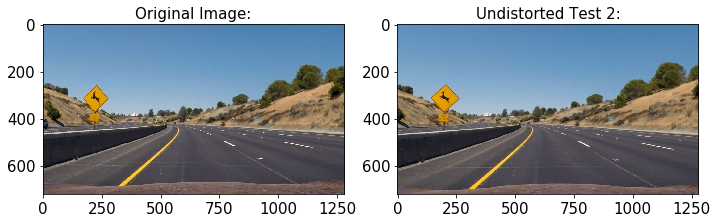

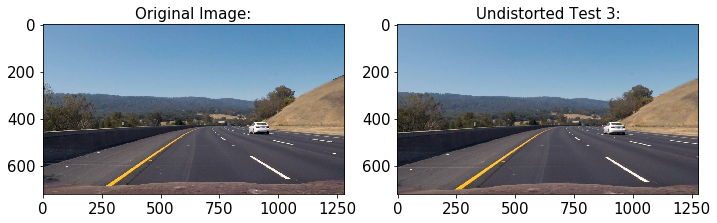

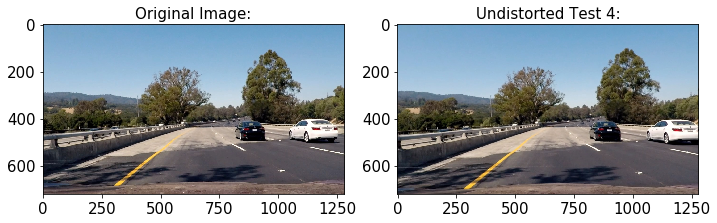

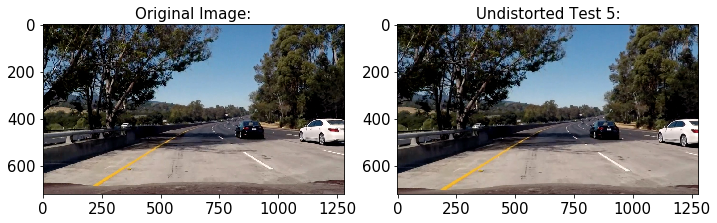

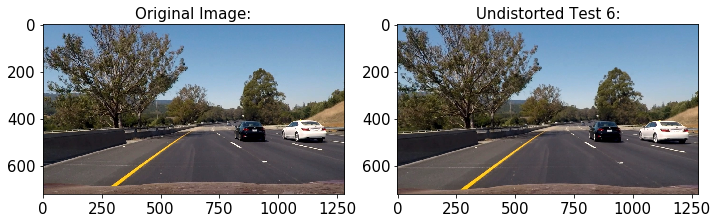

In [26]:
pipeline(op='Undistorted')

test_images  6


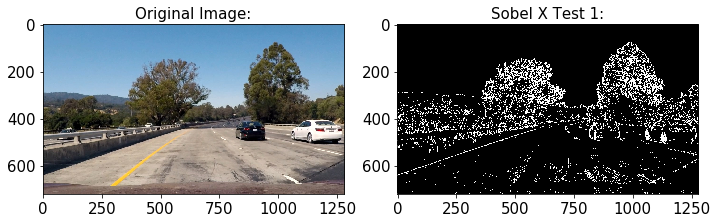

In [27]:
def sobel_x(img, threshold_MIN=15, threshold_MAX=255):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= threshold_MIN) & (scaled_sobel <= threshold_MAX)] = 1
    return binary_output

pipeline(op='Sobel X')